
## Librerias

In [42]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import random
from sklearn import linear_model
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt

## Carga de dataset

In [43]:
data = np.load('C:\\Users\\Best Computer\\Desktop\\Juan Erick Sr\\MaestriaCienciaDeDatos\\CienciaDeDatosConPython\\Proyecto\\proyecto_training_data.npy')


## Partición de base de datos en 80% entranamiento y 20% validación/test

In [44]:
np.random.seed(19810523)
idx_train = random.sample(range(len(data)), int(len(data)*.8))
idx_test = list(set(range(len(data))) - set(idx_train))

data_train = pd.DataFrame(data[idx_train,:])
data_train.columns = ['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']
data_train['grupo'] = 'training'

data_test = pd.DataFrame(data[idx_test,:])
data_test.columns = ['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']
data_test['grupo'] = 'test'

dataset = data_train.append(data_test, ignore_index=True)


## Análsis exploratorio de datos

### Datos faltantes

In [45]:

dataset.isna().sum()

SalePrice         0
OverallQual       0
1stFlrSF          0
TotRmsAbvGrd      0
YearBuilt         0
LotFrontage     259
grupo             0
dtype: int64

### Estadísticos descriptivos


#### 1. DataSet total

In [46]:
eda = dataset.describe()
eda

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


#### 2. DataSet entrenamiento

In [47]:
eda_train = dataset[dataset['grupo'] == 'training'].describe()
eda_train

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,952.000000
mean,182348.835616,6.114726,1167.553938,6.547945,1971.496575,70.680672
std,80540.514228,1.383780,386.648835,1.651079,29.935950,24.948926
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,130875.000000,5.000000,884.000000,5.000000,1954.000000,60.000000
50%,164600.000000,6.000000,1093.000000,6.000000,1973.000000,70.000000
75%,215000.000000,7.000000,1419.750000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


#### 3. DataSet validación / test

In [48]:
eda_test = dataset[dataset['grupo'] == 'test'].describe()
eda_test

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,292.000000,292.000000,292.000000,292.000000,292.000000,249.000000
mean,175210.636986,6.037671,1142.917808,6.397260,1970.352740,67.638554
std,74749.127867,1.380504,386.376728,1.515008,31.283905,21.432891
min,35311.000000,2.000000,480.000000,3.000000,1875.000000,21.000000
25%,125500.000000,5.000000,878.750000,5.000000,1952.750000,55.000000
50%,155500.000000,6.000000,1065.000000,6.000000,1972.000000,66.000000
75%,206212.500000,7.000000,1339.250000,7.000000,2001.000000,80.000000
max,501837.000000,10.000000,3138.000000,11.000000,2009.000000,150.000000


### Observaciones

1. Solo se observa que  la variable LofFrontage presenta anomalias al tener datos vacios. 
2. El precio promedio de una casa es de 182K.
3. No se observa datos atipicos en todas las variables.
4. Los estadísticos descriptivos entre la partición  total, entrenamiento y validación son muy similares esto indica que no hay sesgo en las particiones.


### HISTOGRAMAS

#### 1. SalePrice

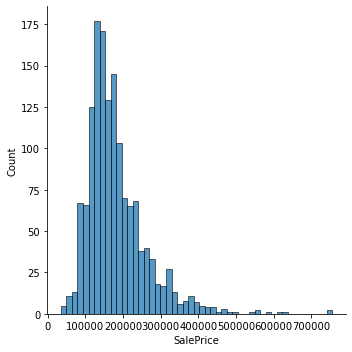

In [49]:
sns.displot(dataset['SalePrice']) 


#### 2. OverallQual

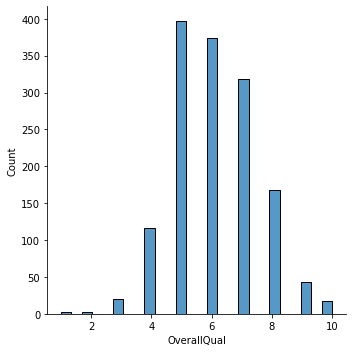

In [50]:
sns.displot(dataset['OverallQual'])


#### 3. 1stFlrSF

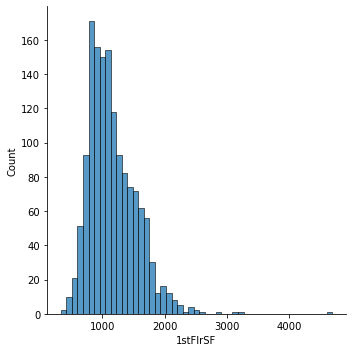

In [51]:
sns.displot(dataset['1stFlrSF'])


#### 4. TotRmsAbvGrd

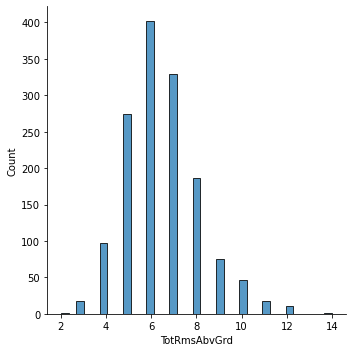

In [52]:
sns.displot(dataset['TotRmsAbvGrd'])


#### 5. YearBuilt

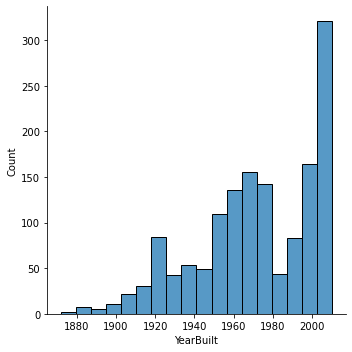

In [53]:
sns.displot(dataset['YearBuilt'])


#### 6. LotFrontage

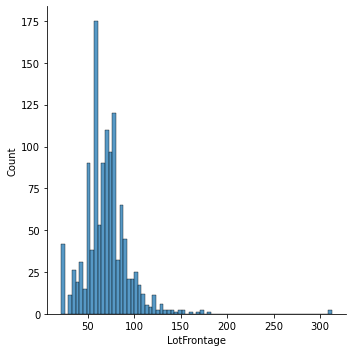

In [54]:
sns.displot(dataset['LotFrontage'])

### SCARTPLOT

#### 1. OverallQual

Text(0.5, 1.0, 'La correlación es 0.791')

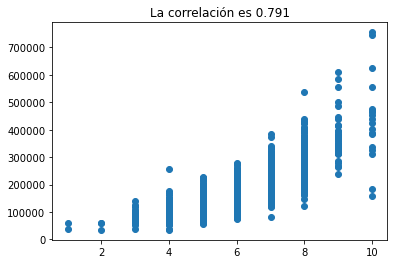

In [55]:
plt.scatter(x='OverallQual', y='SalePrice', data = dataset); plt.title(f'La correlación es {round(pearsonr(dataset["SalePrice"], dataset["OverallQual"])[0],3)}')


#### 2. 1stFlrSF

Text(0.5, 1.0, 'La correlación es 0.606')

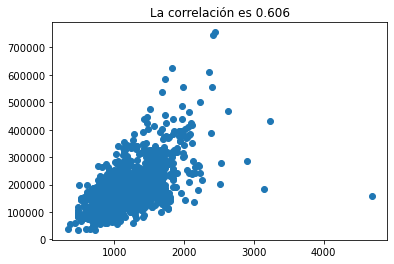

In [56]:
plt.scatter(x='1stFlrSF', y='SalePrice', data = dataset); plt.title(f'La correlación es {round(pearsonr(dataset["SalePrice"], dataset["1stFlrSF"])[0],3)}')


#### 3. TotRmsAbvGrd

Text(0.5, 1.0, 'La correlación es 0.534')

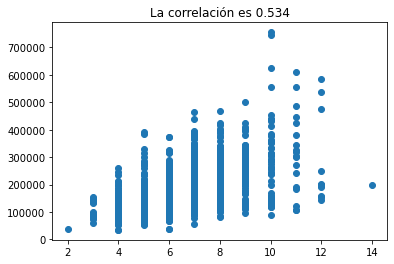

In [57]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data = dataset); plt.title(f'La correlación es {round(pearsonr(dataset["SalePrice"], dataset["TotRmsAbvGrd"])[0],3)}')


#### 4. YearBuilt

Text(0.5, 1.0, 'La correlación es 0.523')

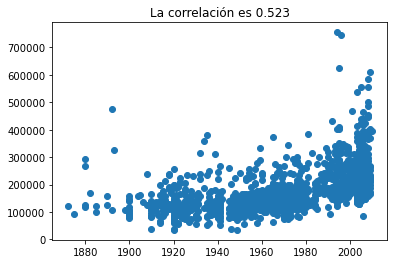

In [58]:
plt.scatter(x='YearBuilt', y='SalePrice', data = dataset); plt.title(f'La correlación es {round(pearsonr(dataset["SalePrice"], dataset["YearBuilt"])[0],3)}')


#### 5. LotFrontage

Text(0.5, 1.0, 'La correlación es 0.352')

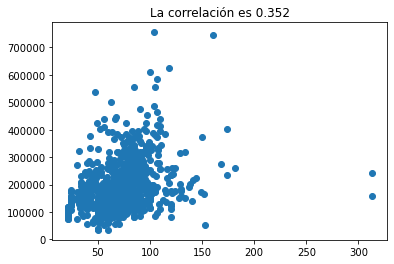

In [59]:
plt.scatter(x='LotFrontage', y='SalePrice', data = dataset); plt.title(f'La correlación es {round(pearsonr(dataset[~pd.isna(dataset["LotFrontage"])]["SalePrice"], dataset[~pd.isna(dataset["LotFrontage"])]["LotFrontage"])[0],3)}')


### Variables con más potencial predictivo

<AxesSubplot:>

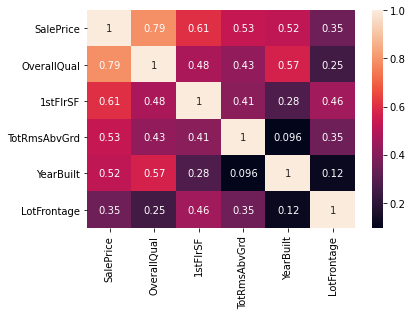

In [60]:
sns.heatmap(dataset.corr(), annot = True)


Las variables con mayor potencial predictivo son OverallQual (correlación de 0.79) y 1stFlrSF (correlación de 0.61)

## Función para entrenar un modelo de regresión lineal de una variable y = mx +b.


### Funciones

In [61]:
def LinReg(x, y, lr = .01, epochs = 10000):
    m = len(x)
    one = np.ones(m) 
    X = np.array([one,x])
    w = np.zeros(2)
    error = []
    
    for it in range(epochs):
        y_pred = np.dot(X.T,w)
        res = y_pred - y
        err = np.sum(res**2)/(2*m)
        error.append(err)
        grad = np.dot(X,res)/m
        w = w - lr*grad
    return({'params':w, 'errores':error})


def predictLR(x,w):
    m = len(x)
    one = np.ones(m) 
    X = np.array([one,x]).T
    pred = np.dot(X, w)
    return pred

def rmse(y, y_hat):
    return np.sqrt(np.sum((y_hat - y)**2)/len(y))

def r2_score(y, y_hat):
    ssr = np.sum((y_hat - y)**2)
    sst = np.sum((y - np.mean(y))**2)
    return 1 - (ssr/sst)


### Modelo1

<AxesSubplot:>

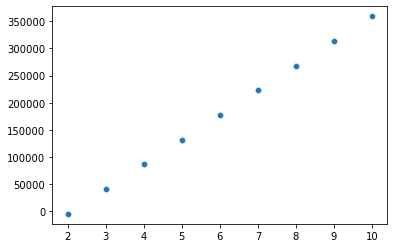

In [62]:
model1 = LinReg(x = np.array(dataset[dataset['grupo'] == 'training']['OverallQual']),
                y = np.array(dataset[dataset['grupo'] == 'training']['SalePrice']))

params1 = model1['params']
err1 = model1['errores'][10:]
pred1 = predictLR(x = np.array(dataset[dataset['grupo'] == 'test']['OverallQual']),
                  w = params1)

e2m1 = rmse(y = np.array(dataset[dataset['grupo'] == 'test']['SalePrice']),
            y_hat = pred1)

r2_mod1 = r2_score(y = np.array(dataset[dataset['grupo'] == 'test']['SalePrice']),
                   y_hat = pred1)

sns.scatterplot(x = np.array(dataset[dataset['grupo'] == 'test']['OverallQual']),
                y = pred1)

#### Intercepto y coeficiente

In [63]:
params1

array([-95890.1691479 ,  45509.89624475])

#### Intercepto y coeficiente scikit-learn

In [64]:
X = np.array(dataset[dataset['grupo'] == 'training']['OverallQual']).reshape(-1, 1)
Y = np.array(dataset[dataset['grupo'] == 'training']['SalePrice']) 
regr = linear_model.LinearRegression()
regr.fit(X, Y)
[regr.intercept_, regr.coef_]

[-96764.25542021525, array([45646.05017233])]

#### Evolución del error

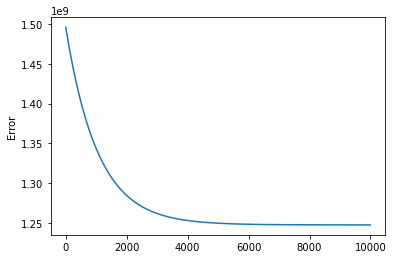

In [65]:
plt.plot(err1)
plt.ylabel('Error')
plt.show()

#### Error en validación

In [66]:
e2m1

42752.638844956644

#### Acertividad

In [67]:
r2_mod1

0.6717509674025107

### Modelo2

El segundo modelo deberia estimarse con la variable 1stFlrSF pero me generó problemas de overflow, así que tuve que realizarlo con la tercera variable mas predictiva.

<AxesSubplot:>

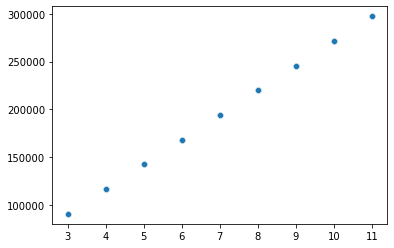

In [68]:


model2 = LinReg(x = np.array(dataset[dataset['grupo'] == 'training']['TotRmsAbvGrd']),
                y = np.array(dataset[dataset['grupo'] == 'training']['SalePrice']))

params2 = model2['params']
err2 = model2['errores'][10:]
pred2 = predictLR(x = np.array(dataset[dataset['grupo'] == 'test']['TotRmsAbvGrd']),
                  w = params2)

e2m2 = rmse(y = np.array(dataset[dataset['grupo'] == 'test']['SalePrice']),
            y_hat = pred2)

r2_mod2 = r2_score(y = np.array(dataset[dataset['grupo'] == 'test']['SalePrice']),
                   y_hat = pred2)

sns.scatterplot(x = np.array(dataset[dataset['grupo'] == 'test']['TotRmsAbvGrd']),
                y = pred2)

#### Intercepto y coeficiente

In [69]:
params2

array([12991.57289488, 25863.95090763])

#### Intercepto y coeficiente scikit-learn

In [70]:
X2 = np.array(dataset[dataset['grupo'] == 'training']['TotRmsAbvGrd']).reshape(-1, 1)
Y2 = np.array(dataset[dataset['grupo'] == 'training']['SalePrice']) 
regr2 = linear_model.LinearRegression()
regr2.fit(X2, Y2)
[regr2.intercept_, regr2.coef_]

[13017.705678706232, array([25860.19348421])]

#### Evolución del error

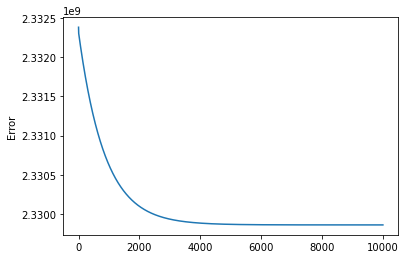

In [71]:
plt.plot(err2)
plt.ylabel('Error')
plt.show()

#### Acertividad

In [72]:
r2_mod2

0.2969123744606209

### CONCLUSION

1. El porcentaje de acierto del modelo1 que es explicado con la variable OverallQual es de 67% vs 30% cuando es explicado con la variable TotRmsAbvGrd. 
